<a href="https://colab.research.google.com/github/Jaew00/DeepLearning/blob/main/%5B%EC%8B%A4%EC%8A%B505%5D_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Packages



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

MNIST train, test dataset가져오기

In [2]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(),
                      target_transform=None, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



대략적인 데이터 형태

mnist_train 길이 : 10000
mnist_test 길이 : 10000
image data 형태: torch.Size([1, 28, 28])
label: 7


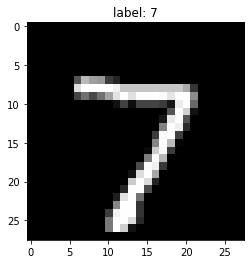

In [3]:
print("mnist_train 길이 :", len(mnist_test))
print("mnist_test 길이 :", len(mnist_test))

# 데이터 하나의 형태
image, label = mnist_test.__getitem__(0) # 0번째 데이터
print("image data 형태:", image.size())
print("label:", label)

# 그리기
img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

MNIST data 띄어보기

5
torch.Size([1, 28, 28])
5


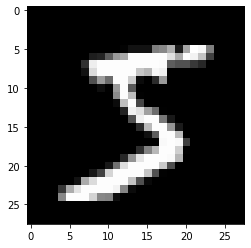

0


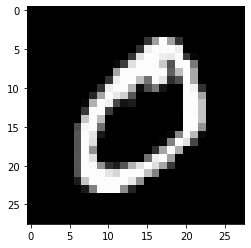

4


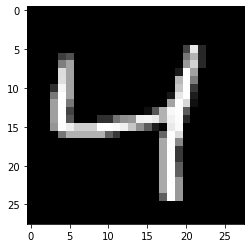

In [4]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3) :
  img = mnist_train[i][0].numpy()
  print(mnist_train[i][1])
  plt.imshow(img[0], cmap='gray')
  plt.show()

convolution 하나씩 씌어보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])
torch.Size([1, 3, 28, 28])


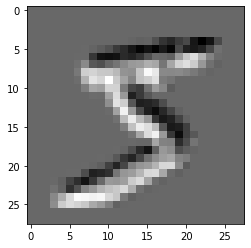

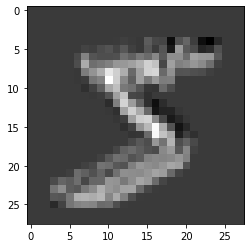

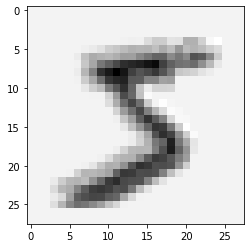

In [5]:
image, label = mnist_train[0]

image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size = 3, padding =1)
output = conv_layer(Variable(image))
print(output.size())

print(output.size())

for i in range(3):
  plt.imshow(output[0, i, :, :].data.numpy(), cmap='gray')
  plt.show()

CNN 만들기

train, test data 가져오기

In [6]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [7]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size, #mnist_train을 훈련시키자.
                                          shuffle = True, num_workers=2,
                                          drop_last=True) #batch_size 만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                          shuffle = False, num_workers=2, # test 데이터에 대해서는 shuffle를 하지 않는다.
                                          drop_last=True)

CNN 클래스 만들기(모델 만들기)

In [8]:
class CNN(nn.Module) :
  def __init__(self) :
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1, 16, 5, padding=2),
        nn.ReLU(),

        nn.Conv2d(16, 32, 5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),

        nn.Conv2d(32, 64, 5, padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )

    self.fc_layer=nn.Sequential(
        nn.Linear(64*7*7, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)
    out = self.fc_layer(out)
    return out

model = CNN().cuda()

In [9]:
for parameter in model.parameters() :
  print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [10]:
loss_func = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
for i in range(num_epoch) :
  for j, [image, label] in enumerate(train_loader) :
    x = Variable(image).cuda()
    y_ = Variable(label).cuda()

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j%50 == 0 :
      print(loss, j, i)
  torch.save(model, '/content/drive/MyDrive/학교 수업 자료/18. 심층학습/12주차/weights/mnist/mnist_weights_%d.pkl' %(num_epoch))

tensor(0.0147, device='cuda:0', grad_fn=<NllLossBackward0>) 0 0
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>) 50 0
tensor(0.0856, device='cuda:0', grad_fn=<NllLossBackward0>) 0 1
tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward0>) 50 1
tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward0>) 0 2
tensor(0.0896, device='cuda:0', grad_fn=<NllLossBackward0>) 50 2
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>) 0 3
tensor(0.2499, device='cuda:0', grad_fn=<NllLossBackward0>) 50 3
tensor(0.0436, device='cuda:0', grad_fn=<NllLossBackward0>) 0 4
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>) 50 4
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>) 0 5
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>) 50 5
tensor(0.0332, device='cuda:0', grad_fn=<NllLossBackward0>) 0 6
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>) 50 6
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>) 0 7
tensor(0.0161, device='cuda:0', g

In [ ]:
try :
  model = torch.load("/content/drive/MyDrive/학교 수업 자료/18. 심층학습/12주차/weights/mnist/mnist_weights_%d.pkl")
  print("model restored")
except :
  print("model not restored")
    

In [14]:
def ComputeAccr(dloader, imodel):
  correct = 0
  total = 0

  for j, [imgs, labels] in enumerate(dloader) : # batch_size 만큼
    img = Variable(imgs).cuda() 
    label = Variable(labels).cuda()

    output = imodel.forward(img)
    _, output_index = torch.max(output, 1)

    total += label.size(0)
    correct += (output_index == label).sum().float()

  print("Accuracy of Test Data: {}".format(100*correct/total))

In [15]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 95.73999786376953
